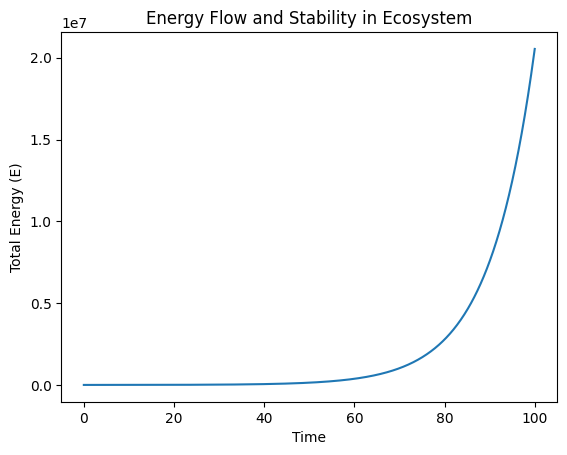

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 定义总能量变化率方程
def dEdt(E, t, gamma_E, delta_E, N_male, N_female, N_predator, N_competitor, N_parasite):
    return gamma_E * E - delta_E * (N_male + N_female + N_predator + N_competitor + N_parasite)

# 参数初始化
gamma_E = 0.1  # 能量的生产或输入系数
delta_E = 0.05  # 能量的损失系数
N_male = 50  # 雄性数量
N_female = 50  # 雌性数量
N_predator = 10  # 捕食者数量
N_competitor = 20  # 竞争者数量
N_parasite = 5  # 寄生者数量
E0 = 1000  # 初始总能量

# 时间跨度
t = np.linspace(0, 100, 1000)  # 从0到100时间单位，1000个点

# 解微分方程
result = odeint(dEdt, E0, t, args=(gamma_E, delta_E, N_male, N_female, N_predator, N_competitor, N_parasite))

# 绘图
plt.plot(t, result)
plt.xlabel('Time')
plt.ylabel('Total Energy (E)')
plt.title('Energy Flow and Stability in Ecosystem')
plt.show()

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 修改微分方程函数的参数顺序为(y, t, ...)
def dAll(y, t, gamma_E, delta_E,R, f, lambd, alpha, beta, delta_p, delta_r, gamma_c, delta_c):
    E, N_male, N_female, N_predator, N_competitor, N_parasite = y
    
    # 能量变化率
    dE_dt = gamma_E * E - delta_E * (N_male + N_female + N_predator + N_competitor + N_parasite)
    
    # Assume simplified models for population dynamics
    dN_male_dt = R * f - lambd * N_predator * N_male - gamma_c * N_competitor * N_male  # 竞争影响雄性
    dN_female_dt = R * (1 - f) - lambd * N_parasite * N_female - gamma_c * N_competitor * N_female  # 寄生影响雌性
    
    dN_predator_dt = alpha * N_predator * N_male - delta_p * N_predator - delta_c * N_competitor * N_predator  # 竞争者影响捕食者
    #dN_predator_dt = s * predator - b * predator * prey
    dN_parasite_dt = beta * N_parasite * N_female - delta_r * N_parasite - delta_c * N_competitor * N_parasite  # 竞争者影响寄生者
    #dN_parasite_dt = alpa * competitor - gamma * competitor * alligator
    dN_competitor_dt = -delta_c * N_competitor # 竞争者的自身动态，可能包括与其他种群的竞争或自身的衰减
    #dN_competitor_dt =  delta * parasite - rho * parasite * host
    return [dN_male_dt, dN_female_dt, dN_predator_dt, dN_parasite_dt, dN_competitor_dt]

# 参数初始化
gamma_E = 0.1
delta_E = 0.05
alpha_predator = 0.02  # 捕食者生长率
beta_competitor = 0.015  # 竞争者生长率
omega_parasite = 0.02  # 寄生者生长率

# 初始条件
E0 = 1000
N_male0 = 50
N_female0 = 50
N_predator0 = 10
N_competitor0 = 20
N_parasite0 = 5
initial_conditions = [E0, N_male0, N_female0, N_predator0, N_competitor0, N_parasite0]

# 参数
R = 0.1  # 繁殖率
f = 0.5  # 性别比例
lambd = 0.01  # 捕食/寄生因子
alpha = 0.02  # 捕食者转化率
beta = 0.02  # 寄生者转化率
delta_p = 0.05  # 捕食者死亡率
delta_r = 0.05  # 寄生者死亡率
gamma_c = 0.01  # 竞争对雄性和雌性的影响
delta_c = 0.05  # 竞争者对捕食者和寄生者的影响

# 时间跨度
t = np.linspace(0, 100, 1000)

# 解微分方程组
result = odeint(dAll, initial_conditions, t, args=(gamma_E, delta_E,R, f, lambd, alpha, beta, delta_p, delta_r, gamma_c, delta_c))

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(t, result[:, 0], label='Total Energy (E)')
plt.plot(t, result[:, 1], label='Males')
plt.plot(t, result[:, 2], label='Females')
plt.plot(t, result[:, 3], label='Predators')
plt.plot(t, result[:, 4], label='Competitors')
plt.plot(t, result[:, 5], label='Parasites')
plt.xlabel('Time')
plt.ylabel('Population / Energy')
plt.legend()
plt.title('Dynamic Ecosystem Model')
plt.show()

RuntimeError: The size of the array returned by func (5) does not match the size of y0 (6).